<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/IntegrationProj7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Rajat Lamsal
*   Bishnu Rijal
*   Pratim khadka




  Instructor: Nicolas Jachob.

  CPSMA 4413 NUMERICAL METHODS -01.

In [ ]:

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math

lets cosider the original function that we used in our previous project  $f(x) = \cos x$ and investigate the area covered by the first hump,
$$
A = \int_0^\frac{\pi}{2}\cos x\ dx
$$

Text(0.5, 1.0, 'Function $cosx$')

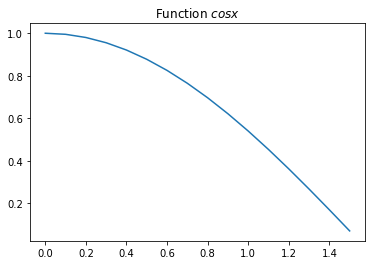

In [ ]:
x = np.arange( 0,(3.15/2),.1)  # plotting the graph for cosx at pi/2.
plt.plot(x,np.cos(x))
plt.title("Function $cosx$")

Now we are going to use the exact integral calulation and compare it with the value we will get using the right hand and left hand Reimann Sum. We will be using the scipy package.

Lets do it by hand!

$$
\begin{align}
A &= \int_0^ \frac{\pi}{2} \ cosx \ dx\\
&= \sin x\vert_0^\frac{\pi}{2}\\
&= \sin\frac{\pi}{2}-\sin 0\\
&= 1
\end{align}
$$

In [ ]:
actual = integrate.quad(np.cos ,0,np.pi/2) ##using built in integration function to check the value
print(actual)

(0.9999999999999999, 1.1102230246251564e-14)


Numerical Integration: Reimann Sum

we are going to calculate the Riemann sum by choosing the three different types: which are left, center and tight hand sum. Reimann Sum is a calculation of the actual area underneath the graph of a curve f(x) which is resulted by dividing it into multiple shapes like rectangles. We are going to use $\Delta x = \frac{b-a}n$ to find the partitions of equal size and length. therefore, points will be:
$$
A\approx \sum_{i=1}^n f(a+i\Delta x)\Delta x
$$


In [ ]:
def dex(a,b,n):                         #defining our delta x 
  return (b-a)/n

def riemannSum(function,a,b,n,indicator = 'right'):                   #defines riemann Sum fuction with indicator to choose
  dx = dex(a,b,n)
  if indicator == 'right':
    start = 1
  elif indicator == 'left':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum += function(a + j*dx)*dx
  return sum



We want to estiate our function usng 10 rectangles:

In [ ]:
riemannSum(np.cos, 0,np.pi/2,10,'left')                #riemann Sum for left hand side

1.076482802694102

We are going to visually present the bargraph of the left endpoint:

Text(0.5, 1.0, 'Left Endpoint')

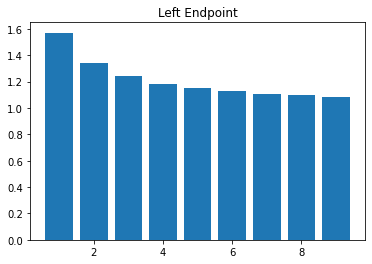

In [ ]:
x_axis = [i for i in range(1,10,1)] ## x_axis as number of rectangles 
y_axis = [riemannSum(np.cos, 0,np.pi/2, i, 'left') for i in range(1,10,1)] ##y_axis as our estimated value

plt.bar(x_axis, y_axis)

plt.title("Left Endpoint")

In [ ]:
riemannSum(np.cos, 0,np.pi/2,10,'right')             #riemann Sum for right hand side.

0.9194031700146126

Text(0.5, 1.0, 'Right Endpoint')

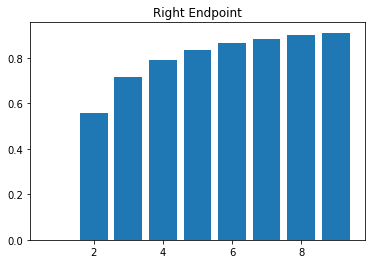

In [ ]:
x_axis = [i for i in range(1,10,1)] ## x_axis as number of rectangles 
y_axis = [riemannSum(np.cos, 0,np.pi/2, i, 'right') for i in range(1,10,1)] ##y_axis as our estimated value

plt.bar(x_axis, y_axis)

plt.title("Right Endpoint")

In [ ]:
riemannSum(np.cos, 0,np.pi/2,10,'mid')  

1.0010288241427083

Text(0.5, 1.0, 'Midpoint')

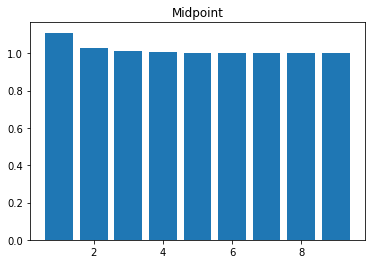

In [ ]:
x_axis = [i for i in range(1,10,1)] ## x_axis as number of rectangles 
y_axis = [riemannSum(np.cos, 0,np.pi/2, i, 'mid') for i in range(1,10,1)] ##y_axis as our estimated value

plt.bar(x_axis, y_axis)

plt.title("Midpoint")

For the Reimann Sum above, we used left, center and right. Now, we are going to compute the error occured while estimating the the sum using different numbers of rectangles.

In [ ]:
def error(estimate):
  error_val = (actual - estimate)/estimate
  return abs(error_val)*100

rectangles = [i for i in range(6, 72, 6)]
actual_list = [integrate.quad(np.cos ,0,np.pi/2)[0] for i in range(6,72,6)]
estimate = [riemannSum(np.cos, 0, np.pi/2, i, 'mid') for i in range(6, 72, 6)]

percentage = [error(est)[0] for est in estimate]




In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(values=['No of Rectangle', 'Actual Value', 'Estimated Value','Percentage Error']),
    cells=dict(values=[rectangles, actual_list, estimate, percentage]))
])
fig.show()

If we take the average of these two sums then our ans will be close to 0 which is the integration of the function we have taken.

We will now be using the simpson's $\frac 13$.Simpson's $\frac 13$ expression is mentioned below: 
$$
\int_a^b f(x)\ dx
\approx 
\frac{\Delta x}3 
\left[
f(a)
+
4\sum_{odd} f(x_i)
+
2\sum_{even} f(x_i)
+
f(b)
\right]
$$

In [ ]:
def simpson(function, a, b , n):              # defines Simpsons rule
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n,2): #odds
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): #evens
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: #endpoints
    sum = sum + function(i)
  sum = dx /3 *sum #multiply by the width/3
  return sum

In [ ]:
simp = simpson(np.cos, 0 , np.pi/2,10)              
print(simp)

1.10472314734056


In [ ]:
print(f"Percentage error = {error(simp)[0]}")

Percentage error = 9.479582969965282


If given strictly increasing function, Its better to use Trapezoidal rule because of its accuracy than other methods when it comes to increasing function. On the other hand, if we are given undulating graphs, we would go with simpsons rule.